In [1]:
from fastai.tabular import *

import pandas as pd
import numpy as np

import glob

In [2]:
df = pd.concat([pd.read_csv(f, encoding='latin1') for f in glob.glob('../data/v4/*.csv')])

In [3]:
df.shape

(521444, 33)

In [4]:
df.head()

,origin_day,origin_hour,origin_day_sin,origin_day_cos,origin_hour_sin,origin_hour_cos,origin_density_cluster,origin_speed_cluster,origin_distance_from_density_center,origin_bearing_from_density_center,...,origin_distance_from_speed_center_squared,dest_distance_from_density_center_squared,dest_distance_from_speed_center_squared,distance_origin_dest_squared,distance_origin_dest_density_cluster_squared,distance_origin_dest_speed_cluster_squared,day_hour_crossing,origin_dest_density_cluster_crossing,origin_dest_speed_cluster_crossing,duration
0,3,9,0.9749,0.2225,0.9239,0.3827,12,16,1.0846,-174.3222,...,5.6027,2.1880,6.0128,369.5314,344.2287,322.8346,81,243,339,2130
1,4,11,0.9749,-0.2225,0.9914,0.1305,3,15,2.1962,112.9280,...,3.5547,0.7585,7.3100,230.9367,198.0916,205.6585,107,76,308,900
2,0,2,0.0000,1.0000,0.2588,0.9659,4,10,1.6362,2.8973,...,1.2735,0.3941,2.7278,109.4304,128.2534,99.2036,2,91,206,977
3,2,22,0.7818,0.6235,0.2588,-0.9659,3,19,0.8167,-167.5233,...,3.9295,7.0405,5.8443,104.5016,125.6125,81.9966,70,61,391,935
4,6,22,0.4339,-0.9010,0.2588,-0.9659,13,0,0.8750,-44.0458,...,9.5883,1.6569,0.2905,204.1955,196.4034,254.5333,166,271,6,1477


In [5]:
df.duration = df.duration.astype('float32')

In [6]:
cont_names = [
    'origin_day_sin', 'origin_day_cos', 'origin_hour_sin', 'origin_hour_cos',
    'origin_distance_from_density_center', 'origin_bearing_from_density_center',
    'origin_distance_from_speed_center', 'origin_bearing_from_speed_center',
    'dest_distance_from_density_center', 'dest_bearing_from_density_center',
    'dest_distance_from_speed_center', 'dest_bearing_from_speed_center',
    'distance_origin_dest', 'bearing_origin_dest',
    'distance_origin_dest_density_cluster', 'distance_origin_dest_speed_cluster',
    'origin_distance_from_density_center_squared', 'origin_distance_from_speed_center_squared',
    'dest_distance_from_density_center_squared', 'dest_distance_from_speed_center_squared',
    'distance_origin_dest_squared', 
    'distance_origin_dest_density_cluster_squared', 'distance_origin_dest_speed_cluster_squared',
]
cat_names = [
    "origin_day", "origin_hour",
    "origin_density_cluster", "origin_speed_cluster",
    "dest_density_cluster", "dest_speed_cluster",
    "day_hour_crossing", "origin_dest_density_cluster_crossing", "origin_dest_speed_cluster_crossing"
]
dep_var = 'duration'

In [7]:
procs = [Categorify, Normalize]

In [8]:
np.random.seed(2020)
valids = np.random.random(521444)

In [9]:
valid_idx = df[valids > 0.9].index

In [10]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=valid_idx, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [11]:
learn = tabular_learner(
    data, layers=[512, 256, 64], ps=[0.4, 0.4, 0.4], metrics=root_mean_squared_error
)

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


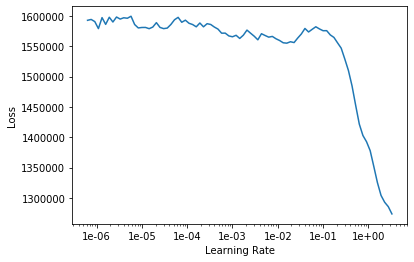

In [13]:
learn.recorder.plot()

In [14]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(21, 9)
    (3): Embedding(21, 9)
    (4): Embedding(21, 9)
    (5): Embedding(21, 9)
    (6): Embedding(169, 28)
    (7): Embedding(401, 46)
    (8): Embedding(397, 46)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(23, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=194, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=64, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(64, eps=

In [15]:
learn.fit_one_cycle(1, 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,79551.414062,62020.082031,243.964279,05:33


In [16]:
learn.fit_one_cycle(1, 0.5)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,85882.796875,3342515.500000,907.569031,06:16


In [17]:
learn.fit_one_cycle(1, 0.02)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,75196.164062,73914.835938,251.662567,05:47


In [18]:
learn.export('dev-fastai-999-balance.pkl')

In [19]:
# for production - train 100 % of the data

In [28]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=df.index, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [29]:
learn = tabular_learner(
    data, layers=[512, 256, 64], ps=[0.4, 0.4, 0.4], metrics=root_mean_squared_error
)

In [30]:
learn.fit_one_cycle(8, 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,89078.359375,86087.976562,280.761047,08:55
1,92311.312500,79973.703125,276.164520,08:46
2,98712.328125,79926.546875,275.925476,08:37
3,102012.328125,80200.500000,277.367157,08:34
4,92856.859375,75346.023438,269.041321,06:05
5,90283.609375,71915.750000,262.873688,05:28
6,78576.023438,68243.859375,253.588791,05:33
7,70336.367188,51477.988281,223.487045,05:32


In [31]:
learn.fit_one_cycle(2, 0.4)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,98657.039062,81909.062500,278.232025,05:27
1,81344.320312,66597.773438,250.679413,05:30


In [32]:
learn.fit_one_cycle(8, 0.02)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,76453.328125,57393.820312,235.488251,05:24
1,83200.437500,86980.007812,276.048340,05:27
2,78065.296875,60275.800781,240.832199,05:27
3,75282.156250,60118.644531,240.365295,05:29
4,73328.304688,56992.195312,233.764938,05:29
5,67961.460938,49898.085938,219.530884,05:27
6,61487.378906,45515.589844,209.737625,05:28
7,63393.839844,43756.410156,205.604553,05:29


In [33]:
learn.fit_one_cycle(4, 0.005)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,68021.343750,49120.910156,217.574509,05:31
1,69865.312500,47750.957031,215.184052,05:27
2,62380.914062,44008.402344,206.287308,05:28
3,57919.062500,40482.589844,197.856003,05:28


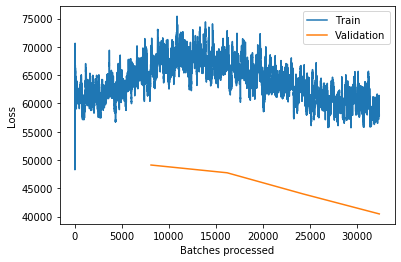

In [34]:
learn.recorder.plot_losses()

In [35]:
learn.export('fastai-999-balance.pkl')

In [ ]:
learn = load_learner('../models/', 'fastai-999-balance.pkl')